<a href="https://colab.research.google.com/github/juhumkwon/Defense_Cloud/blob/main/3_1_Gradient_Boosting(iris%EB%8D%B0%EC%9D%B4%ED%84%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

모델 정확도: 1.0000
분류 리포트:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



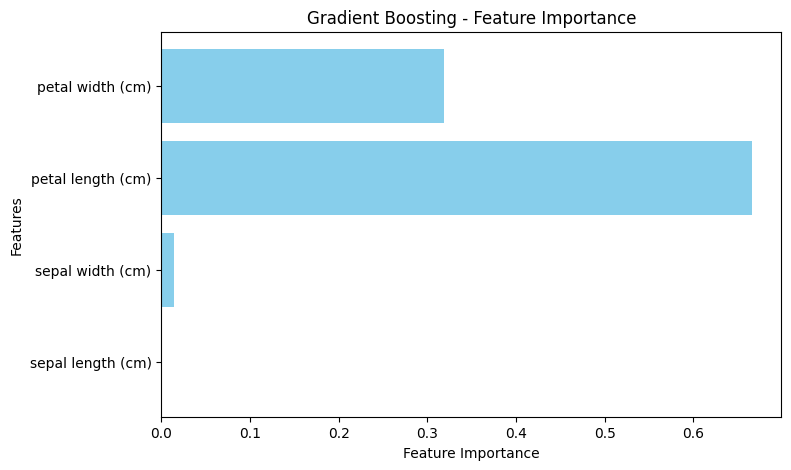


테스트 데이터 예측 결과:
실제 클래스: versicolor
예측된 클래스: versicolor
------------------------------
실제 클래스: setosa
예측된 클래스: setosa
------------------------------
실제 클래스: virginica
예측된 클래스: virginica
------------------------------
실제 클래스: versicolor
예측된 클래스: versicolor
------------------------------
실제 클래스: versicolor
예측된 클래스: versicolor
------------------------------


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Iris 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 2. 데이터 분할 (훈련: 80%, 테스트: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 그래디언트 부스팅 분류기 생성 및 학습
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# 4. 예측 수행 (테스트 데이터)
y_pred = gb_clf.predict(X_test)

# 5. 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")
print("분류 리포트:\n", classification_report(y_test, y_pred))

# 6. 특성 중요도 시각화
plt.figure(figsize=(8, 5))
plt.barh(iris.feature_names, gb_clf.feature_importances_, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Gradient Boosting - Feature Importance")
plt.show()

# 7. 새로운 데이터에 대한 추론 기능 추가
def predict_new_sample(sample):
    """새로운 샘플에 대해 클래스를 예측하는 함수"""
    sample = np.array(sample).reshape(1, -1)  # 입력 데이터를 2D 배열로 변환
    predicted_class = gb_clf.predict(sample)[0]
    class_name = iris.target_names[predicted_class]  # 클래스 이름 가져오기
    print(f"예측된 클래스: {class_name}")

# 8. 테스트 데이터 중 일부를 추론
print("\n테스트 데이터 예측 결과:")
for i in range(5):  # 처음 5개 샘플만 확인
    sample = X_test[i]
    print(f"실제 클래스: {iris.target_names[y_test[i]]}")
    predict_new_sample(sample)
    print("-" * 30)
